In [2]:
import numpy as np 
import pandas as pd
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# df = pd.read_csv('spam.csv')
df_t = pd.read_csv('fake-news/True.csv')
df_f = pd.read_csv('fake-news/Fake.csv')


In [4]:
# Generate labels True/Fake under new Target Column in 'true_data' and 'fake_data'
df_t['Target'] = ['True']*len(df_t)
df_f['Target'] = ['Fake']*len(df_f)

# Merge 'true_data' and 'fake_data', by random mixing into a single df called 'data'
df = df_t.append(df_f).sample(frac=1).reset_index().drop(columns=['index'])

df

,title,text,subject,date,Target
0,"Maine, New Jersey end state government shutdowns",(Reuters) - New Jersey and Maine ended partial...,politicsNews,"July 3, 2017",True
1,Boiler Room #61 – Hello From the Gutter,Tune in to the Alternate Current Radio Network...,US_News,"June 16, 2016",Fake
2,Trump says Puerto Rico's debt will have to be ...,(Reuters) - President Donald Trump said on Tue...,worldnews,"October 4, 2017",True
3,"HEY, BERNIE SANDERS: 18 SCHOOL SHOOTINGS Have ...",The left has locked onto a stat that 18 school...,politics,16-Feb-18,Fake
4,WATCH: Everybody Laughed After Watching This ...,"If you listen to Senator Marco Rubio, ISIS is ...",News,"January 17, 2016",Fake
...,...,...,...,...,...
44893,White House says Tillerson to remain as secret...,WASHINGTON (Reuters) - Rex Tillerson will rema...,politicsNews,"November 30, 2017",True
44894,"Iran says missile program non-negotiable, deni...",ANKARA (Reuters) - Iran said on Friday its bal...,worldnews,"October 6, 2017",True
44895,UK says world will stand together against Nort...,LONDON (Reuters) - Britain said on Friday the ...,worldnews,"September 15, 2017",True
44896,White House urges ban on non-compete agreement...,(Reuters) - The Obama administration on Tuesda...,politicsNews,"October 25, 2016",True


In [5]:
# Target column is made of string values True/Fake,  change it to numbers 0/1 (such that Fake=1) 
df['label'] = pd.get_dummies(df.Target)['Fake']
df

,title,text,subject,date,Target,label
0,"Maine, New Jersey end state government shutdowns",(Reuters) - New Jersey and Maine ended partial...,politicsNews,"July 3, 2017",True,0
1,Boiler Room #61 – Hello From the Gutter,Tune in to the Alternate Current Radio Network...,US_News,"June 16, 2016",Fake,1
2,Trump says Puerto Rico's debt will have to be ...,(Reuters) - President Donald Trump said on Tue...,worldnews,"October 4, 2017",True,0
3,"HEY, BERNIE SANDERS: 18 SCHOOL SHOOTINGS Have ...",The left has locked onto a stat that 18 school...,politics,16-Feb-18,Fake,1
4,WATCH: Everybody Laughed After Watching This ...,"If you listen to Senator Marco Rubio, ISIS is ...",News,"January 17, 2016",Fake,1
...,...,...,...,...,...,...
44893,White House says Tillerson to remain as secret...,WASHINGTON (Reuters) - Rex Tillerson will rema...,politicsNews,"November 30, 2017",True,0
44894,"Iran says missile program non-negotiable, deni...",ANKARA (Reuters) - Iran said on Friday its bal...,worldnews,"October 6, 2017",True,0
44895,UK says world will stand together against Nort...,LONDON (Reuters) - Britain said on Friday the ...,worldnews,"September 15, 2017",True,0
44896,White House urges ban on non-compete agreement...,(Reuters) - The Obama administration on Tuesda...,politicsNews,"October 25, 2016",True,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Target   44898 non-null  object
 5   label    44898 non-null  uint8 
dtypes: object(5), uint8(1)
memory usage: 1.8+ MB


In [7]:
# check for nulls
df.isna().sum().sum()

0

In [8]:
# check for duplicate values
df.duplicated().sum()

209

In [9]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [10]:
# check 
df.duplicated().sum()

0

# **EDA**

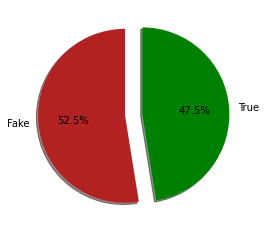

In [11]:
import matplotlib.pyplot as plt# check for null
# Checking if our data is well balanced
label_size = [df['label'].sum(),len(df['label'])-df['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','green'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%');

The data is balanced 

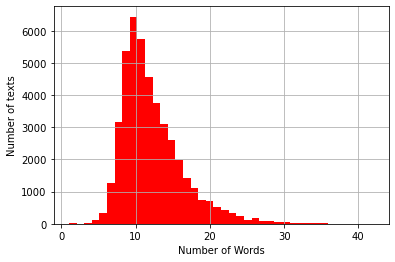

In [12]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(titles.split()) for titles in df['title']]

pd.Series(seq_len).hist(bins = 40,color='red')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts');

most of the titles have a max of 20 words

In [13]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric words
    text = [word for word in text if word.isalnum()]
    
    # Load stopwords and punctuation
    stopwords = set(nltk.corpus.stopwords.words('english'))
    punctuation = set(string.punctuation)
    
    # Remove stopwords and punctuation
    text = [word for word in text if word not in stopwords and word not in punctuation]
    
    # Stem words
    text = [ps.stem(word) for word in text]
    
    # Join words into a single string
    text = " ".join(text)
    
    return text

In [14]:
df['transformed_title'] = df['title'].apply(transform_text)
df.head()

,title,text,subject,date,Target,label,transformed_title
0,"Maine, New Jersey end state government shutdowns",(Reuters) - New Jersey and Maine ended partial...,politicsNews,"July 3, 2017",True,0,main new jersey end state govern shutdown
1,Boiler Room #61 – Hello From the Gutter,Tune in to the Alternate Current Radio Network...,US_News,"June 16, 2016",Fake,1,boiler room 61 hello gutter
2,Trump says Puerto Rico's debt will have to be ...,(Reuters) - President Donald Trump said on Tue...,worldnews,"October 4, 2017",True,0,trump say puerto rico debt wipe
3,"HEY, BERNIE SANDERS: 18 SCHOOL SHOOTINGS Have ...",The left has locked onto a stat that 18 school...,politics,16-Feb-18,Fake,1,hey berni sander 18 school shoot happen year
4,WATCH: Everybody Laughed After Watching This ...,"If you listen to Senator Marco Rubio, ISIS is ...",News,"January 17, 2016",Fake,1,watch everybodi laugh watch bizarr fantasi mar...


In [15]:
from wordcloud import WordCloud

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'black',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='g')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} words")
    plt.show()

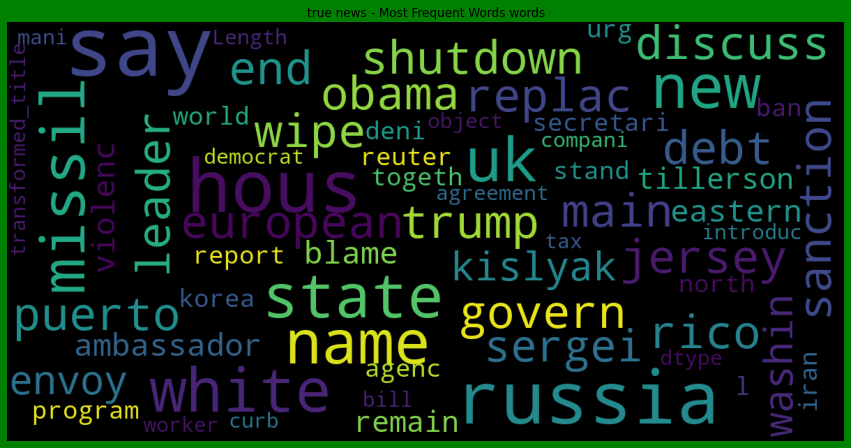

In [16]:
# true - Frequent words in training data
Display_wordcloud(df['transformed_title'][df['Target']=='True'],"true news - Most Frequent Words")

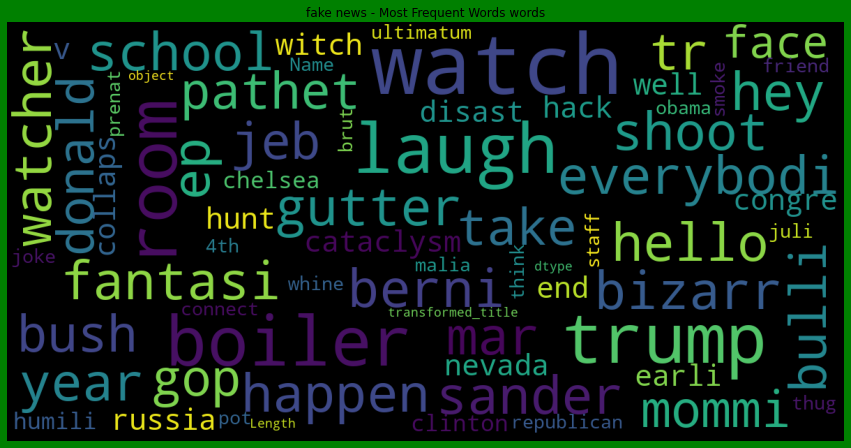

In [17]:
# true - Frequent words in training data
Display_wordcloud(df['transformed_title'][df['Target']=='Fake'],"fake news - Most Frequent Words")

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [19]:
onehot_repr=[one_hot(words,5000)for words in df['transformed_title']] 
onehot_repr[:4]

[[1599, 3485, 3237, 193, 482, 258, 2193],
 [3167, 57, 1952, 522, 2611],
 [48, 1232, 2656, 887, 251, 4107],
 [3284, 3517, 2213, 3478, 385, 4920, 865, 2532]]

as the size of the document varies from the above graph it is observed that most of the titles have 20 words so using this to pad 

In [20]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  482  258 2193]
 [   0    0    0 ... 1952  522 2611]
 [   0    0    0 ...  887  251 4107]
 ...
 [   0    0    0 ...  769 1065  475]
 [   0    0    0 ... 1648 4522  877]
 [   0    0    0 ... 1426  184  106]]


In [21]:
y=df['label']
y[0:4]

0    0
1    1
2    0
3    1
Name: label, dtype: uint8

In [22]:
len(embedded_docs),y.shape

(44689, (44689,))

In [23]:
# converting to array 
X_final=np.array(embedded_docs)
y_final=np.array(y)

# Model Creation - using bidirectional LSTM

In [24]:
sent_length = 20
embedding_vector_features = 40

model1 = Sequential()
model1.add(Embedding(5000, embedding_vector_features, input_length=sent_length))
model1.add(Bidirectional(LSTM(100, return_sequences=True)))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implementing k-fold cross-validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = []

# for early stoppage
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

for train, test in kfold.split(X_final, y_final):
    model1.fit(X_final[train], y_final[train], epochs=10, batch_size=64, validation_data=(X_final[test], y_final[test]), callbacks=[early_stopping])
    score = model1.evaluate(X_final[test], y_final[test], verbose=0)
    results.append(score[1] * 100)
print("Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(results), np.std(results)))




2023-02-03 08:32:50.198007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 08:32:50.199038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 08:32:50.313160: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 08:32:50.314004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 08:32:50.314803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/10


2023-02-03 08:33:01.239856: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


559/559 [==============================] - 20s 20ms/step - loss: 0.2286 - accuracy: 0.9036 - val_loss: 0.1748 - val_accuracy: 0.9299
Epoch 2/10
559/559 [==============================] - 11s 19ms/step - loss: 0.1425 - accuracy: 0.9455 - val_loss: 0.1590 - val_accuracy: 0.9333
Epoch 3/10
559/559 [==============================] - 9s 15ms/step - loss: 0.1121 - accuracy: 0.9581 - val_loss: 0.1558 - val_accuracy: 0.9400
Epoch 4/10
559/559 [==============================] - 8s 15ms/step - loss: 0.0915 - accuracy: 0.9660 - val_loss: 0.1760 - val_accuracy: 0.9406
Epoch 5/10
559/559 [==============================] - 8s 15ms/step - loss: 0.0724 - accuracy: 0.9737 - val_loss: 0.1710 - val_accuracy: 0.9388
Epoch 6/10
559/559 [==============================] - 9s 16ms/step - loss: 0.0573 - accuracy: 0.9791 - val_loss: 0.2079 - val_accuracy: 0.9381
Epoch 7/10
559/559 [==============================] - 8s 15ms/step - loss: 0.0459 - accuracy: 0.9828 - val_loss: 0.2506 - val_accuracy: 0.9361
Epoch 8/

# Model Evaluation

In [25]:
from sklearn.metrics import roc_auc_score, auc,roc_curve,f1_score, accuracy_score, precision_score,confusion_matrix

In [26]:
y_pred = model1.predict(X_final[test])
y_pred_binary = (y_pred > 0.5).astype(int)

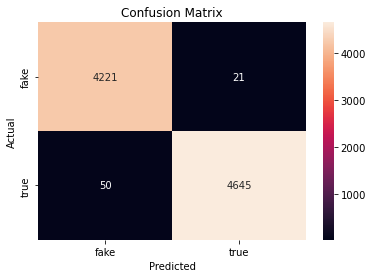

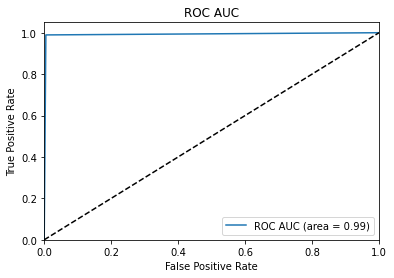


roc_auc: 99.22 %
f1_score: 99.24 %
accuracy: 99.21 %
precision: 99.55 %


In [27]:
import seaborn as sns
cm = confusion_matrix(y_final[test], y_pred_binary)
class_label = ["fake", "true"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('\n')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_final[test], y_pred_binary)

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_final[test], y_pred_binary)

# Plot the ROC AUC curve
plt.plot(fpr, tpr, label='ROC AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.show()


# Calculate the metrics
roc_auc = roc_auc_score(y_final[test], y_pred_binary)
f1 = f1_score(y_final[test], y_pred_binary)
accuracy = accuracy_score(y_final[test], y_pred_binary)
precision = precision_score(y_final[test], y_pred_binary)
    
# Append the metrics to the provided lists
print()
print('roc_auc: {:.2f} %'.format(roc_auc*100))
print('f1_score: {:.2f} %'.format(f1*100))
print('accuracy: {:.2f} %'.format(accuracy*100))
print('precision: {:.2f} %'.format(precision*100))



In [29]:
model1.save('model_file.h5')
